In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import random
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#from userclass import User
import json
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import random
from userclass import User
from sklearn.model_selection import LeaveOneOut
from Utils import recepten_bij_ingredient, ingredienten_bij_recept, recepten_bij_tag, tags_bij_recept, fillInMatrix, customUserDecoder
from itertools import permutations
import seaborn as sns

In [2]:
#meeste_tags_lijst_10

In [3]:
Lijst = ["A", "B", "C", "D"]

#Combinaties_Tags = list(permutations(meeste_tags_lijst_10, 2))

Combinaties_Tags = list(permutations(Lijst, 2))
print(Combinaties_Tags)

#score = [x for x in range(len(Combinaties_Tags))]
#test = list(zip(Combinaties_Tags, score))
#print(test)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]


In [4]:
tagComparisonDf = pd.read_csv("Data/TagComparisonScore1toNSpecific.csv", index_col=0)
display(tagComparisonDf)

,Tag,CrossTag,BestClassifier,Accuracy,RecallScore,ConfusionMatrix
0,aziatisch,"['hollands', 'mexicaans', 'italiaans', 'medite...",Decision Tree,1.00,1.0,[[30 0]\n [ 0 30]]
1,hollands,"['aziatisch', 'mexicaans', 'italiaans', 'medit...",Logistic Regression,1.00,1.0,[[30 0]\n [ 0 30]]
2,mexicaans,"['aziatisch', 'hollands', 'italiaans', 'medite...",Multinomial Naive Bayes,1.00,1.0,[[30 0]\n [ 0 30]]
3,italiaans,"['aziatisch', 'hollands', 'mexicaans', 'medite...",Multinomial Naive Bayes,0.95,1.0,[[27 3]\n [ 0 30]]
4,mediterraan,"['aziatisch', 'hollands', 'mexicaans', 'italia...",Decision Tree,1.00,1.0,[[30 0]\n [ 0 30]]


,"['hollands', 'mexicaans', 'italiaans', 'mediterraan']","['aziatisch', 'mexicaans', 'italiaans', 'mediterraan']","['aziatisch', 'hollands', 'italiaans', 'mediterraan']","['aziatisch', 'hollands', 'mexicaans', 'mediterraan']","['aziatisch', 'hollands', 'mexicaans', 'italiaans']"
aziatisch,1,0,0,0.00,0
hollands,0,1,0,0.00,0
mexicaans,0,0,1,0.00,0
italiaans,0,0,0,0.95,0
mediterraan,0,0,0,0.00,1


<AxesSubplot:>

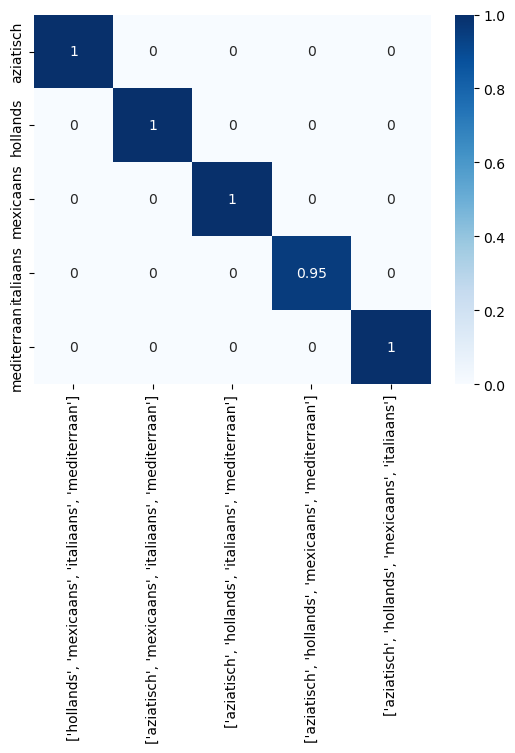

In [5]:
keukensTag = tagComparisonDf["Tag"].unique().tolist()
keukensCrossTag = tagComparisonDf["CrossTag"].tolist()

df = pd.DataFrame(0, index=keukensTag, columns=keukensCrossTag)

for i in range(len(tagComparisonDf["Tag"].tolist())):
    df.loc[tagComparisonDf["Tag"][i],tagComparisonDf["CrossTag"][i]] = tagComparisonDf["Accuracy"][i]
    #df.loc[tagComparisonDf["Tag"][i],tagComparisonDf["CrossTag"][i]] = 1

np.fill_diagonal(df.values, 0)
#BONNO: Hier dus de juiste accuracy score invullen bij de juiste rij-kolom en dan maakt ie er zelf een heatmap van
#Bijvoorbeeld:

#df.loc["aziatisch", "hollands"] = 0.6


#

display(df)
sns.heatmap(df, annot=True, cmap="Blues")